# PROYEK ANALISIS DATA

## Menentukan Pertanyaan Bisnis



1.   Bagaimana persebaran penggunaan sepeda berdasarkan hari kerja dan hari biasa jika dilihat dari rata-rata penggunaan sepeda?
2.   Berdasarkan rata-rata penggunaan sepeda yang dilihat dari kondisi cuaca, cuaca manakah yang memiliki banyak peminat penggunaan sepeda?
3. Berdasarkan penggunaan sepeda setiap harinya, berapa banyak pengguna sepeda yang terdaftar dan tidak terdaftar?



## Menyiapkan Library

In [2]:
import numpy as np # Mengimport library numpy yang digunakan untuk manipulasi data numerik
import pandas as pd # Mengimport library pandas yang digunakan untuk memanipulasi dan menganalisis data
import matplotlib.pyplot as plt # Mengimport library matplotlib yang digunakan untuk visualisasi data
import seaborn as sns # Mengimport library matplotlib yang digunakan untuk visualisasi data atraktif dan informatif

## Data Wrangling

### Gathering Data

In [3]:
# Menggunakan metode read_csv dari pandas untuk membaca file CSV dari URL yang diberikan dan menyimpannya dalam dataframe hour_df
hour_df = pd.read_csv("https://raw.githubusercontent.com/seprinadwicahyani010/Analisis-Data-Python/main/data/hour.csv")
# Menampilkan lima baris pertama dari DataFrame hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Menggunakan metode read_csv dari pandas untuk membaca file CSV dari URL yang diberikan dan menyimpannya dalam dataframe hour_df
day_df = pd.read_csv("https://raw.githubusercontent.com/seprinadwicahyani010/Analisis-Data-Python/main/data/day.csv")
# Menampilkan lima baris pertama dari DataFrame hour_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai Tabel hour

In [5]:
# Memanggil fungsi info() pada DataFrame hour_df untuk memberikan informasi ringkas tentang struktur DataFrame
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Menghitung jumlah nilai NaN pada setiap kolom dataframe
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Menghitung jumlah total duplikat dalam dataframe
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [8]:
# describe() digunakan untuk memberikan ringkasan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menilai tabel day

In [9]:
# Memanggil fungsi info() pada DataFrame day_df untuk memberikan informasi ringkas tentang struktur DataFrame
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# Menghitung jumlah nilai NaN pada setiap kolom dataframe
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Menghitung jumlah total duplikat dalam dataframe
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [12]:
# describe() digunakan untuk memberikan ringkasan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Membersihkan data pada dataframe hour

In [13]:
# Mengganti tipe data yang salah pada dataframe hour
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Membersihkan data pada dataframe day

In [14]:
# Mengganti tipe data yang salah pada dataframe day
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploring Data Analysis (EDA)

In [15]:
# Menggunakan metode describe() dengan argumen include='all', untuk memberikan ringkasan statistik deskriptif untuk semua kolom
day_df.describe(include='all')

<ipython-input-15-353bded60b04>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [16]:
# Menggunakan metode describe() dengan argumen include='all', untuk memberikan ringkasan statistik deskriptif untuk semua kolom
hour_df.describe(include="all")

<ipython-input-16-2d3781e907f6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [18]:
# Membuat kamus weathersit_labels untuk memetakan kode cuaca (dalam kolom 'weathersit_day') ke label cuaca yang sesuai.
# Menggunakan metode .map()
weathersit_labels = {
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan'
}
day_df['weathersit_label'] = day_df['weathersit'].map(weathersit_labels)

In [19]:
# Melakukan pengelompokkan berdasarkan label cuaca yang telah dibuat sebelumnya ('weathersit_label')
# Kemudian menghitung rata-rata nilai 'cnt' (jumlah sepeda yang disewa) untuk setiap label cuaca.
day_df.groupby('weathersit_label')['cnt'].mean().reset_index()

,weathersit_label,cnt
0,Cerah,4876.786177
1,Hujan,1803.285714
2,Mendung,4035.862348


In [21]:
# Pengelompokkan berdasarkan hari kerja ('workingday')
# kemudian menghitung rata-rata nilai 'cnt' (jumlah sepeda yang disewa)
day_df.groupby('workingday')['cnt'].mean().reset_index().sort_values("cnt")

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


In [22]:
# Membuat kamus weekday_labels untuk memetakan kode hari dalam seminggu ke label hari yang sesuai.
# Menggunakan metode .map()
weekday_labels = {
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu',
    7: 'Minggu'
}
day_df['weekday_label'] = day_df['weekday'].map(weekday_labels)

In [23]:
# Melakukan pengelompokkan berdasarkan label hari yang telah dibuat sebelumnya ('weekday_label')
# Kemudian menghitung rata-rata nilai 'cnt' (jumlah sepeda yang disewa) untuk setiap label hari.
day_df.groupby('weekday_label')['cnt'].mean().reset_index()

,weekday_label,cnt
0,Jumat,4690.288462
1,Kamis,4667.259615
2,Rabu,4548.538462
3,Sabtu,4550.542857
4,Selasa,4510.663462
5,Senin,4338.123810


In [24]:
# Menghitung total jumlah sepeda yang disewa (terdaftar dan tidak terdaftar)
# dengan menjumlahkan nilai dalam kolom 'registered' dan 'casual'
total_terdaftar = day_df['registered'].sum()
total_tidakTerdaftar = day_df['casual'].sum()

# Menampilkan hasil perhitungan
print("Total sewa sepeda (terdaftar):", total_terdaftar)
print("Total sewa sepeda (tidak terdaftar):", total_tidakTerdaftar)

Total sewa sepeda (terdaftar): 2672662
Total sewa sepeda (tidak terdaftar): 620017


## Visualisasi Data

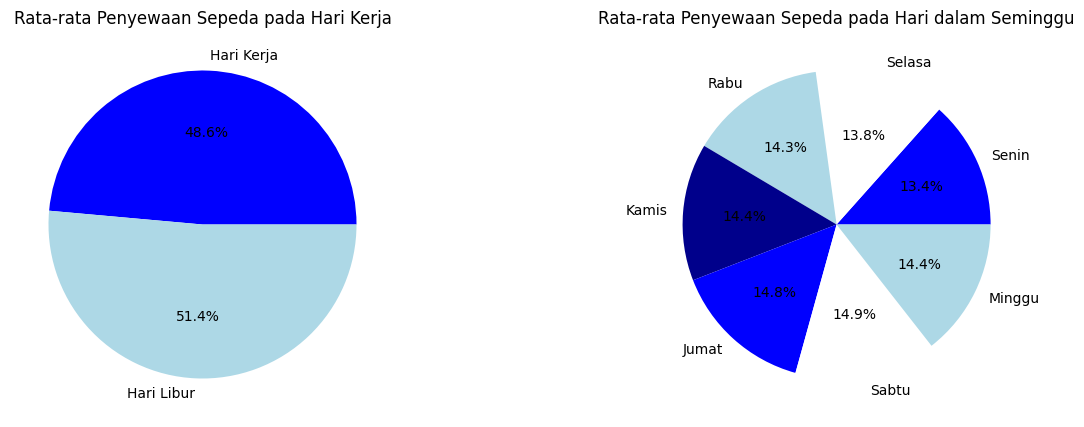

In [25]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari kerja
avg_workday = day_df.groupby('workingday')['cnt'].mean()
# Menghitung rata-rata penyewaan sepeda berdasarkan hari dalam seminggu
avg_weekday = day_df.groupby('weekday')['cnt'].mean()

# Label untuk pie chart pada hari kerja
labels_workday = ['Hari Kerja', 'Hari Libur']
# Label untuk pie chart pada hari dalam seminggu
labels_weekday = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart untuk rata-rata pada hari kerja
axes[0].pie(avg_workday, labels=labels_workday, autopct='%1.1f%%', colors=('blue', 'lightblue'))
axes[0].set_title('Rata-rata Penyewaan Sepeda pada Hari Kerja')

# Pie chart untuk rata-rata pada setiap hari
axes[1].pie(avg_weekday, labels=labels_weekday, autopct='%1.1f%%', colors=('blue', 'white', 'lightblue', 'darkblue'))
axes[1].set_title('Rata-rata Penyewaan Sepeda pada Hari dalam Seminggu')

# Menampilkan plot
plt.show()

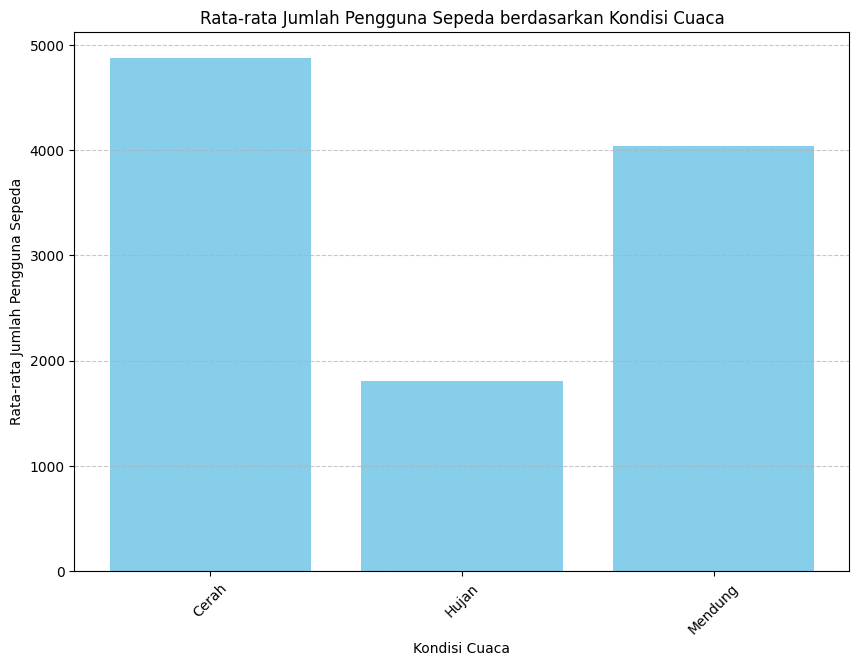

In [26]:
# Melakukan pengelompokan berdasarkan label cuaca dan menghitung rata-rata jumlah pengguna sepeda
avg_weather = day_df.groupby('weathersit_label')['cnt'].mean().reset_index()

# Mengatur ukuran gambar plot
plt.figure(figsize=(10, 7))

# Membuat diagram batang
plt.bar(avg_weather['weathersit_label'], avg_weather['cnt'], color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')

# Memutar label sumbu x sebesar 45 derajat
plt.xticks(rotation=45)

# Menambahkan grid pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


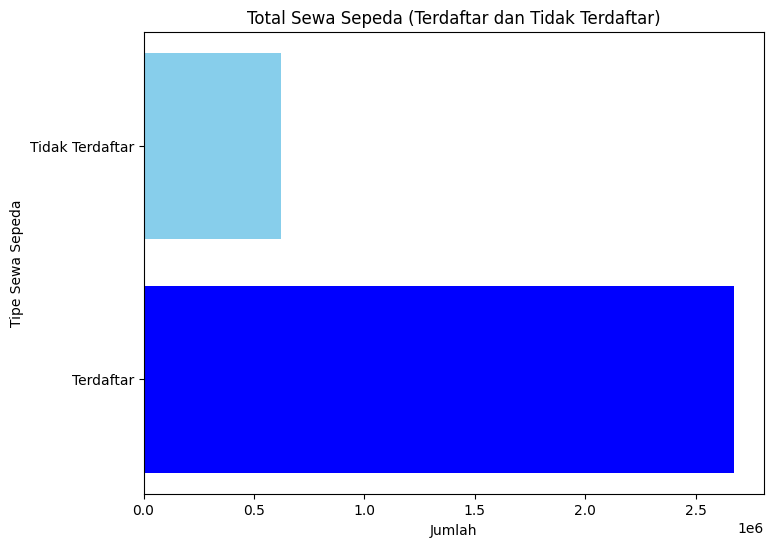

In [27]:
# Menghitung jumlah total sewa sepeda terdaftar dan tidak terdaftar
cnt_bikesharing = [day_df['registered'].sum(), day_df['casual'].sum()]

# Labels untuk plot
labels = ['Terdaftar', 'Tidak Terdaftar']

# Plot bar horizontal
plt.figure(figsize=(8, 6))
plt.barh(labels, cnt_bikesharing, color=['blue', 'skyblue'])

# Judul dan label sumbu
plt.title('Total Sewa Sepeda (Terdaftar dan Tidak Terdaftar)')
plt.xlabel('Jumlah')
plt.ylabel('Tipe Sewa Sepeda')

# Tampilkan plot
plt.show()

## Conclusion

**Pertanyaan 1**

Penggunaan sepeda pada hari kerja cenderung lebih rendah dibandingkan dengan hari libur, karena kebanyakan orang sibuk bekerja pada hari kerja sehingga memiliki sedikit waktu untuk bersepeda. Namun, pada setiap hari dalam seminggu, penggunaan sepeda cenderung lebih tinggi pada hari Sabtu, dengan rata-rata penggunaan sepeda mencapai 14,9%.

**Pertanyaan 2**

Berdasarkan visualisasi data yang menampilkan rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca, terlihat bahwa pengguna sepeda tertinggi terjadi pada kondisi cuaca cerah. Hal ini dapat diinterpretasikan bahwa cuaca yang cerah cenderung memberikan kondisi yang lebih baik bagi orang untuk bersepeda, dibandingkan dengan cuaca yang buruk atau tidak mendukung seperti hujan atau salju.

**Pertanyaan 3**

Berdasarkan perhitungan dan visualisasi data yang telah dilakukan, dapat diketahui bahwa pengguna yang terdaftar terdapat sebanyak 2672662 dan jumlah pengguna sepeda yang tidak terdaftar sebanyak 620017.